# Assignment 6

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

``Objectives``

* This assignment connects all the pieces involved in training feed-forward fully connected neural networks (FFNN);

* You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for two datasets, and then document your findings.

``Data``
* Digits MNIST
* Fashion MNIST

### Import libraries

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from keras.datasets import fashion_mnist
from keras.datasets import mnist

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam

---
### Step 1: Data ingestion

In [19]:
# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()

# Load the Digits MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()

---
### Step 2: Data preprocessing

``Fashion MNIST``

In [20]:
# Normalize
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

``Digits MNIST``

In [21]:
# Normalize
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following task:

1. Show the first training example in X_train_fashion;
2. Show the first training example in X_train_digits;
3. Display the first 5 images in X_train_digits for each class in Y_train_digits, arranged in a 10x5 grid.

(60000, 28, 28)


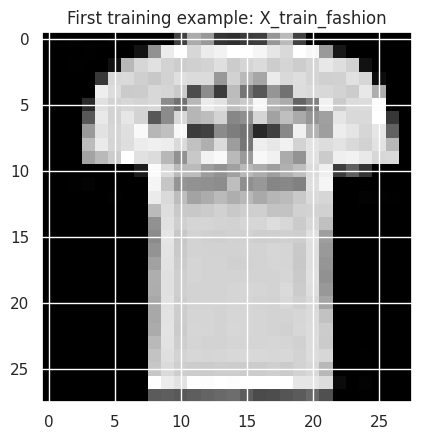

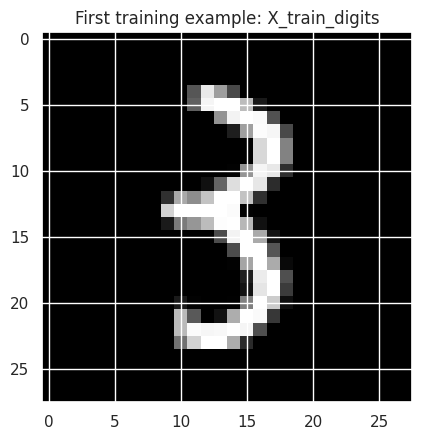

In [22]:
print(X_train_fashion.shape)

#Show the first training example in X_train_fashion;
plt.imshow(X_train_fashion[0], cmap = "gray")
plt.title("First training example: X_train_fashion")
plt.show()

#Show the first training example in X_train_digits;
plt.imshow(X_train_digits[0], cmap = "gray")
plt.title("First training example: X_train_digits")
plt.show()

Unique classes: [0 1 2 3 4 5 6 7 8 9]


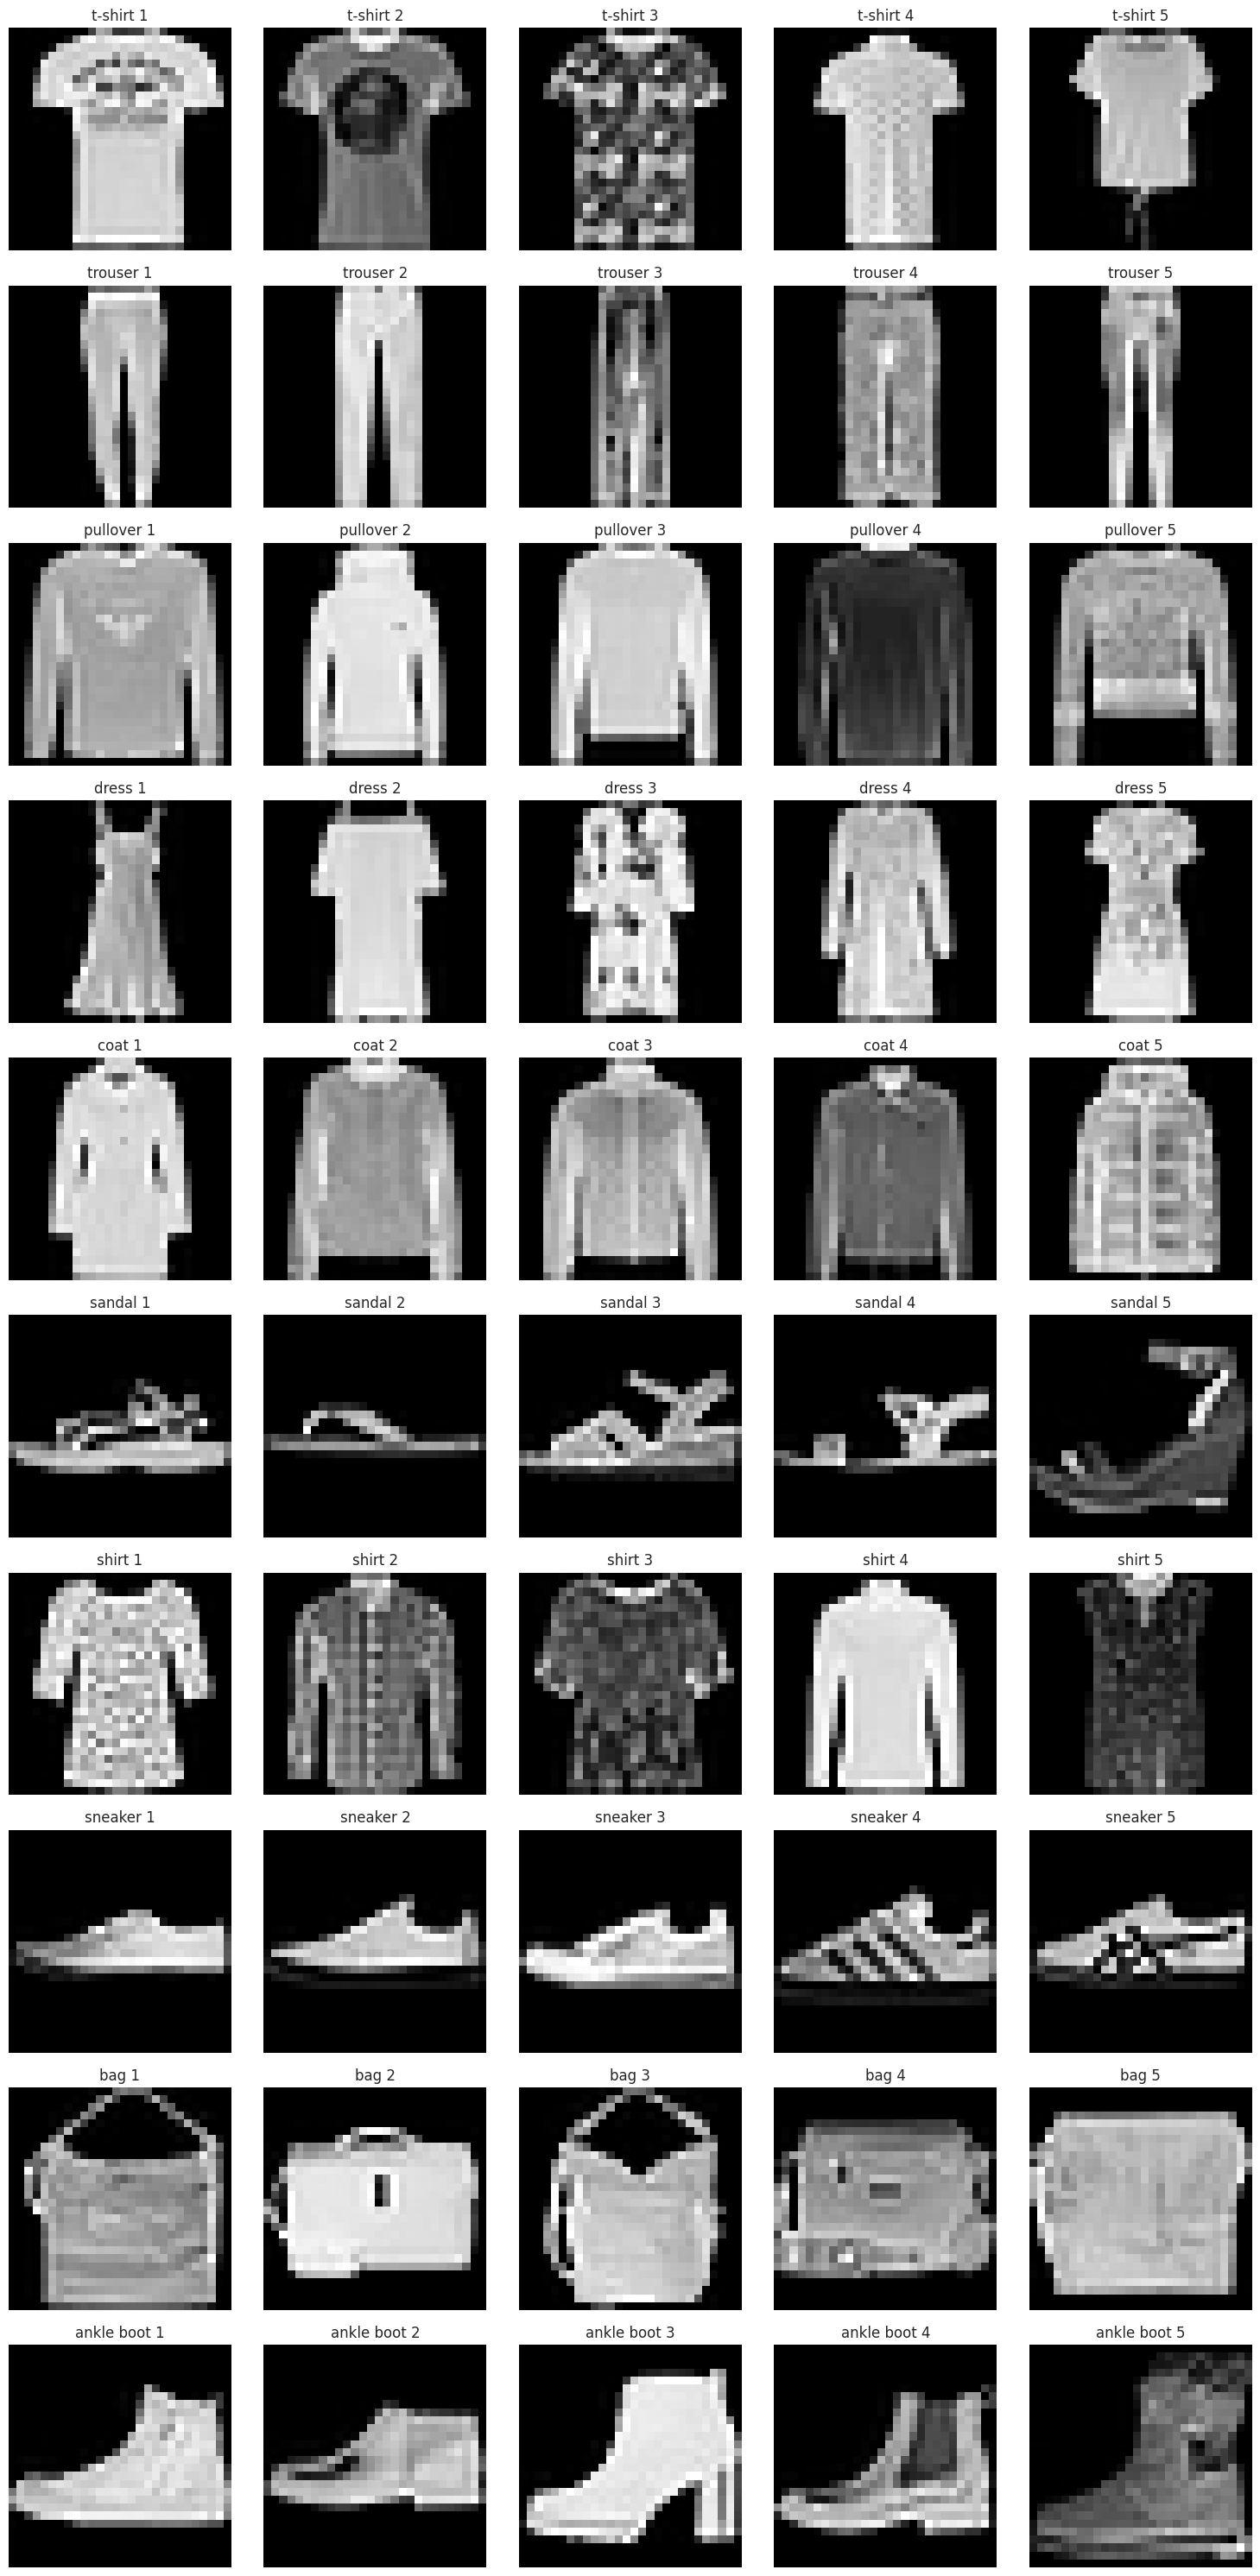

In [23]:
# Assuming label_names is already defined and maps indices to clothing names
label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Unique classes
unique_classes = np.unique(Y_train_fashion)
print(f"Unique classes: {unique_classes}")

# Create a dictionary with clothing names as keys and empty lists as values
indice_dict = {label: [] for label in label_names}

for i, label in enumerate(Y_train_fashion):
    # Get the clothing name corresponding to the label
    article_of_clothing = label_names[label]

    # If the list of the article of clothing has fewer than 5 items, add the index
    if len(indice_dict[article_of_clothing]) < 5:
        indice_dict[article_of_clothing].append(i)

# Create a plot with 10 rows and 5 columns
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(15, 30))

# Plot images
for i, class_name in enumerate(label_names):
    for j, index in enumerate(indice_dict[class_name]):
        ax = axes[i, j]
        ax.imshow(X_train_fashion[index], cmap='gray')
        ax.axis('off')
        ax.set_title(f"{class_name} {j + 1}")

plt.tight_layout()
plt.show()


### Step 4: Modeling

### <span style="color:chocolate">Exercise 2:</span> Define model (20 points)

1. Fill in the <span style="color:chocolate">build_model()</span> function below, including all the arguments listed in the function definition. Note: the activation function parameter is only for the the hidden layers; use the appropriate final classification function for the final layer.

In [24]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01,
                metric='metric'):
    """Build a multi-class logistic regression model using Keras.

    Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.
    metric: The desired metric.

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    # Lets us build the model layer by layer
    model = Sequential()

    # Add hidden layers

    # Iterates through the list of hidden layer sizes
    for units in hidden_layer_sizes:
        # Adds a dense layer with the specified number of units and the specified activation function
        model.add(Dense(units=units, activation=activation))

    # Add output layer
    model.add(Dense(units=n_classes, activation='softmax'))

    #Compile the Model
    if optimizer == 'SGD':
      optimizer = SGD(learning_rate = learning_rate)
    else:
      optimizer = Adam(learning_rate = learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=[metric])

    return model

---
### Step 5: Experiments

You can now run a suite of experiments to see how the hyperparameters and layer sizes effect model performance.

The <span style="color:chocolate">train_and_evaluate()</span> function below can be used to run experiments and retrieve results.

Training the digits model...


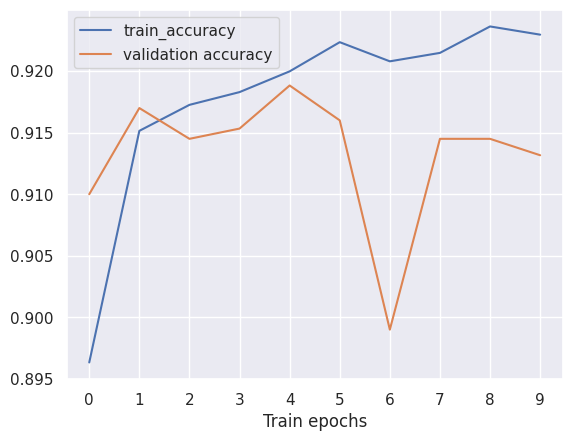

Training accuracy: 0.9230
Validation accuracy: 0.9132


In [25]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       metric='accuracy',
                       num_epochs=10):

  # Build the model.
    model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      metric=metric,
                      learning_rate=learning_rate)

  # Select the dataset.
    if data == 'digits':
        X_train = X_train_digits
        X_test = X_test_digits
        Y_train = Y_train_digits
        Y_test = Y_test_digits

    elif data == 'fashion':
        X_train = X_train_fashion
        X_test = X_test_fashion
        Y_train = Y_train_fashion
        Y_test = Y_test_fashion
    else:
        raise 'Unsupported dataset: %s' %data

    # Reshape the input data to have a channel dimension (required by some Keras layers)
    X_train = X_train.reshape(X_train.shape[0], -1) # Flatten the input data
    X_test = X_test.reshape(X_test.shape[0], -1)


  # Train the model.
    print('Training the', data, 'model...')
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=64,
        validation_split=0.1,
        verbose=0)

    # Retrieve the training metrics (after each train epoch) and the final validation
    # accuracy.
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(val_accuracy, label='validation accuracy')
    plt.xticks(range(num_epochs))
    plt.xlabel('Train epochs')
    plt.legend()
    plt.show()

    print('Training accuracy: %1.4f' %train_accuracy[-1])
    print('Validation accuracy: %1.4f' %val_accuracy[-1])

    return model


# run the function
model = train_and_evaluate()

### <span style="color:chocolate">Exercise 3:</span> Ablation study (50 points)

1. Conduct experiments and record the training and validation set accuracy results in the table below. You may extend the table for additional experiments as needed.
2. Report the hyperparameter values for your preferred architecture configuration.
3. Run the model once more using your preferred hyperparameter configuration.

Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-
 digits | [] | tanh | SGD |0.01| 7850 | 0.9229 | 0.9128
 digits | [] | relu | SGD |0.01| 7850 | 0.9228 | 0.9135
 digits | [] | relu | Adam |0.01| 7850 | 0.9229 | 0.9135
 digits | [128] | relu | Adam |0.01| 101770 | 0.9831 | 0.9700
 digits | [256, 128] | relu | Adam | 0.01| 235146 | 0.9793 | 0.9757
digits | [512, 256, 128] | relu | Adam | 0.00025 | 567434 | 0.9965 | 0.9803
-|-|-|-|-|-|-|-
 fashion | [] | tanh | SGD |0.01| 7850 | 0.8495 | 0.8318
 fashion | [] | relu | SGD |0.01| 7850 | 0.8495 | 0.8317
 fashion | [] | relu | Adam |0.01| 7850 | 0.8495 | 0.8312
 fashion | [128] | relu | Adam |0.01| 101770 | 0.8807 | 0.8562
 fashion | [256, 128] | relu | Adam |0.01| 235146 | 0.8826| 0.8618
 fashion | [512, 256, 128] | relu | Adam | 0.00025 | 567434 | 0.9262 | 0.8900


Training the digits model...


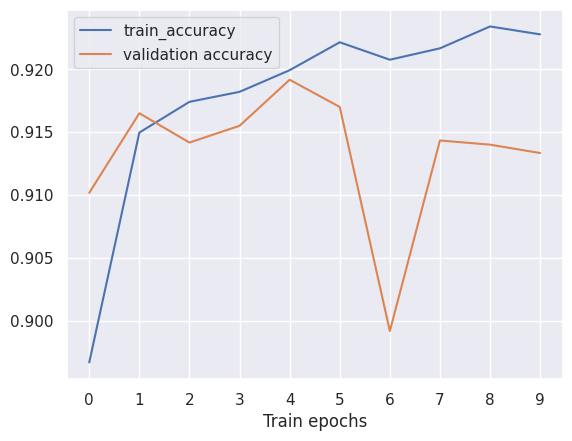

Training accuracy: 0.9228
Validation accuracy: 0.9133


In [26]:
# digits	[]	tanh	SGD	0.01	7850
train_and_evaluate(data='digits',hidden_layer_sizes=[],activation='tanh',optimizer=SGD,learning_rate=0.01)

Training the digits model...


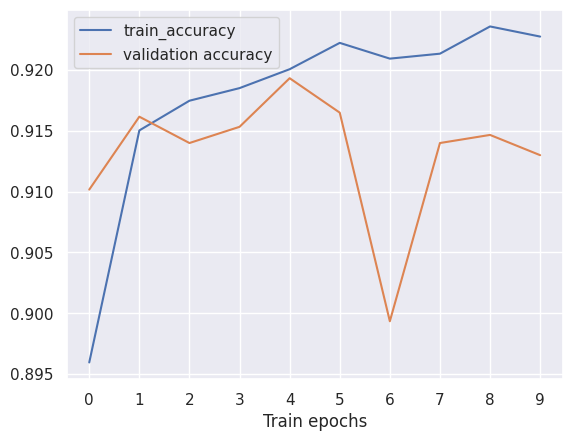

Training accuracy: 0.9228
Validation accuracy: 0.9130


In [27]:
# digits	[]	relu	SGD	0.01	7850
train_and_evaluate(data='digits',hidden_layer_sizes=[],activation='relu',optimizer=SGD,learning_rate=0.01)

Training the digits model...


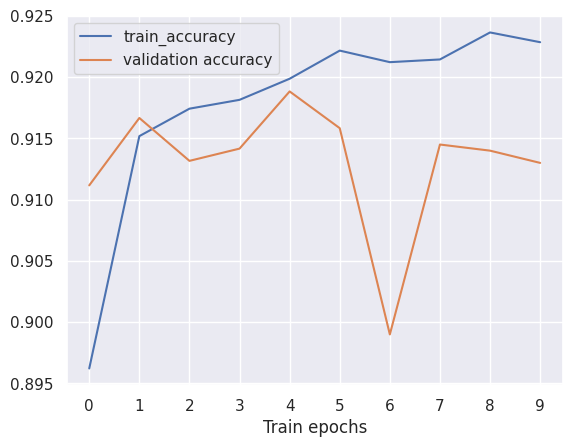

Training accuracy: 0.9229
Validation accuracy: 0.9130


In [28]:
# digits	[]	relu	Adam	0.01	7850
train_and_evaluate(data='digits',hidden_layer_sizes=[],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the digits model...


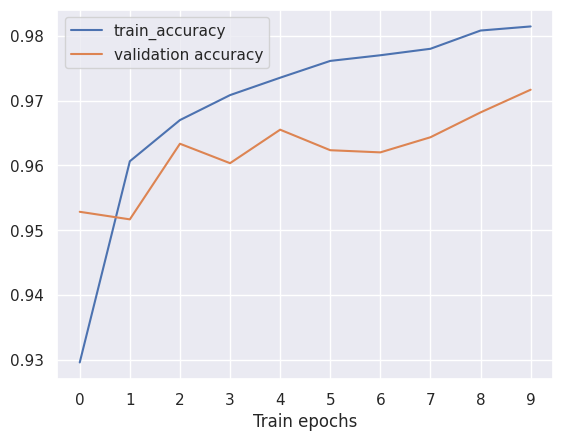

Training accuracy: 0.9814
Validation accuracy: 0.9717


In [29]:
# digits	[128]	relu	Adam	0.01	101770
train_and_evaluate(data='digits',hidden_layer_sizes=[128],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the digits model...


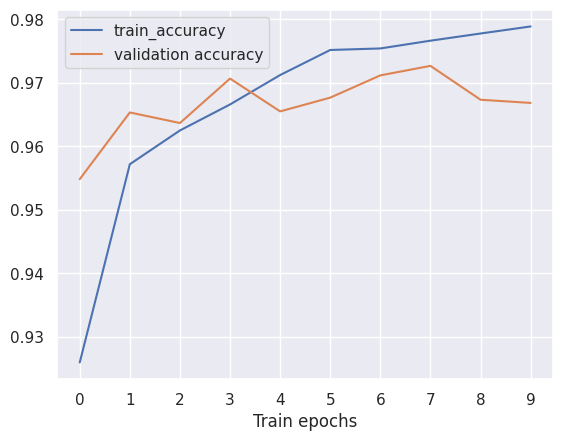

Training accuracy: 0.9789
Validation accuracy: 0.9668


In [30]:
# digits	[256, 128]	relu	Adam	0.01	235146
train_and_evaluate(data='digits',hidden_layer_sizes=[256,128],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the digits model...


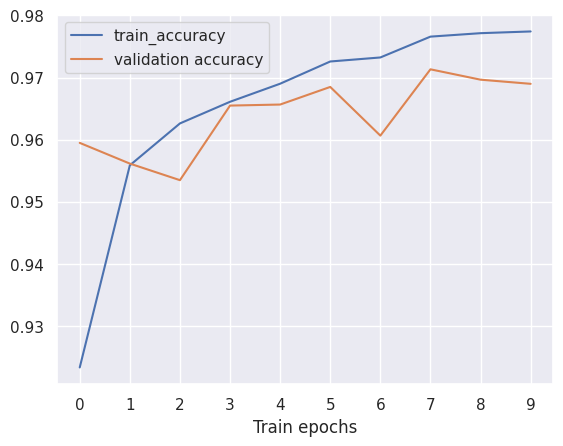

Training accuracy: 0.9774
Validation accuracy: 0.9690


In [31]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='digits',hidden_layer_sizes=[512, 256],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the digits model...


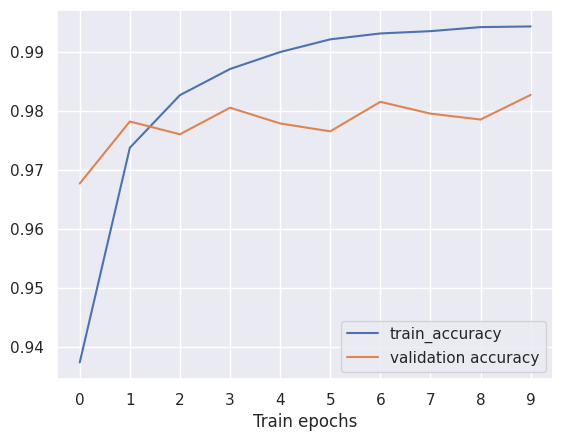

Training accuracy: 0.9943
Validation accuracy: 0.9827


In [32]:
# digits	[512, 256]	relu	Adam	0.001	235146
train_and_evaluate(data='digits',hidden_layer_sizes=[512, 256],activation='relu',optimizer=Adam,learning_rate=0.001)

Training the digits model...


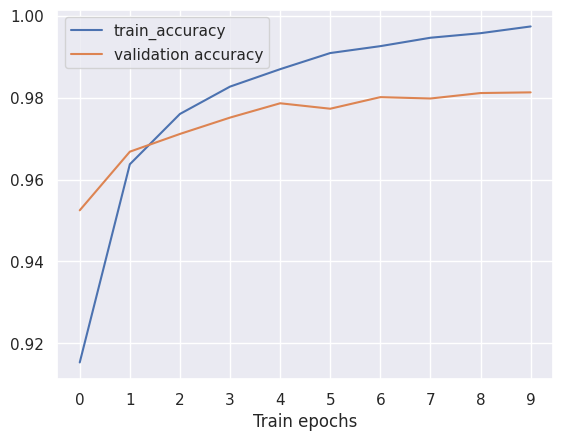

Training accuracy: 0.9974
Validation accuracy: 0.9813


In [33]:
# digits	[512, 256]	relu	Adam	0.00025	235146 0.9973 0.9823
train_and_evaluate(data='digits',hidden_layer_sizes=[512, 256],activation='relu',optimizer=Adam,learning_rate=0.00025)

Training the digits model...


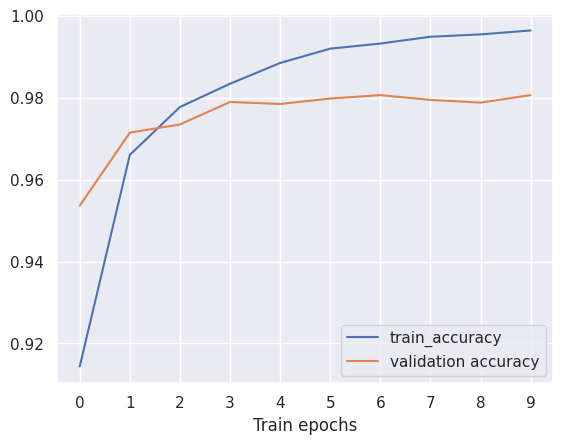

Training accuracy: 0.9965
Validation accuracy: 0.9807


In [34]:
# digits 512, 256, 128] relu Adam 0.00025 567,434 0.9965 0.9803
train_and_evaluate(data = 'digits',  hidden_layer_sizes=[512, 256, 128], activation='relu', optimizer='Adam', learning_rate=0.00025)

--------------
##Fashion

Training the fashion model...


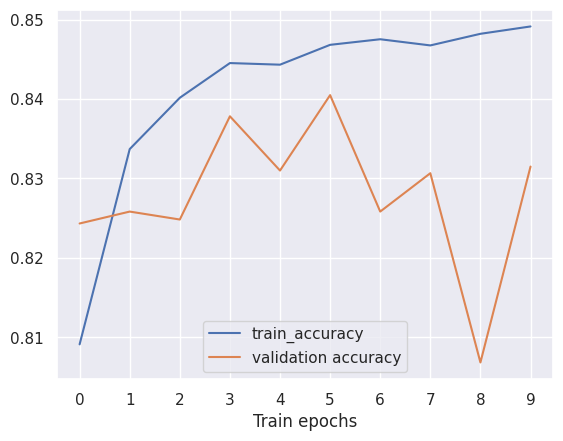

Training accuracy: 0.8491
Validation accuracy: 0.8315


In [35]:
# fashion	[]	tanh	SGD	0.01	7850
train_and_evaluate(data='fashion',hidden_layer_sizes=[],activation='tanh',optimizer=SGD,learning_rate=0.01)

Training the fashion model...


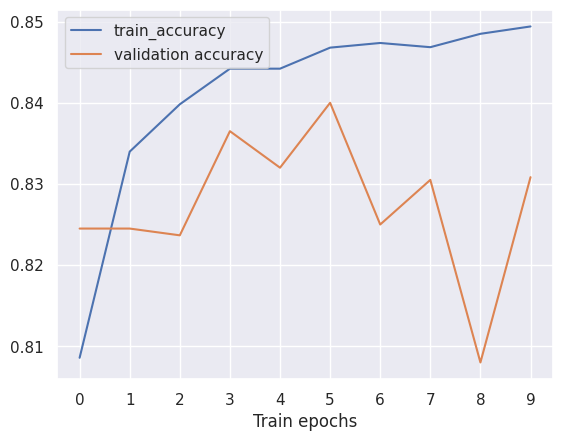

Training accuracy: 0.8494
Validation accuracy: 0.8308


In [36]:
# fashion	[]	relu	SGD	0.01	7850
train_and_evaluate(data='fashion',hidden_layer_sizes=[],activation='relu',optimizer=SGD,learning_rate=0.01)

Training the fashion model...


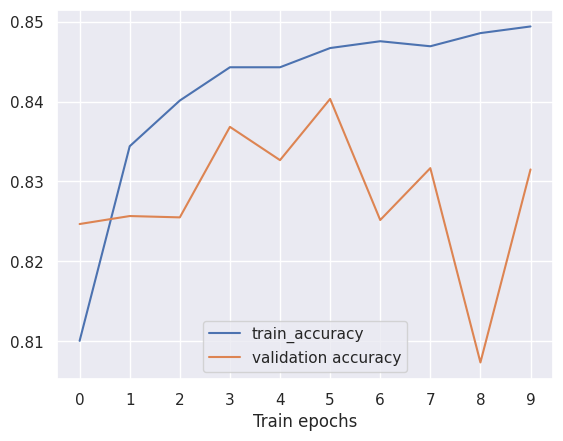

Training accuracy: 0.8494
Validation accuracy: 0.8315


In [37]:
# fashion	[]	relu	Adam	0.01	7850
train_and_evaluate(data='fashion',hidden_layer_sizes=[],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the fashion model...


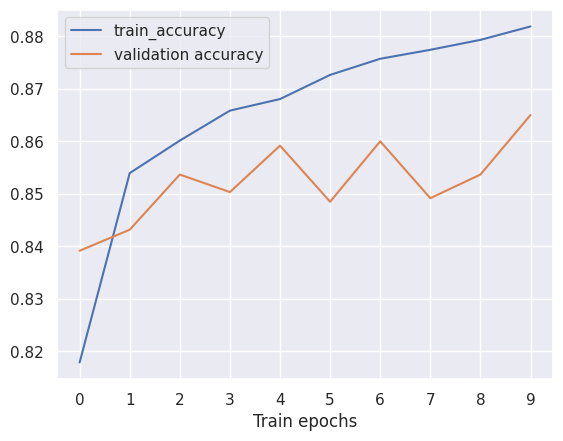

Training accuracy: 0.8819
Validation accuracy: 0.8650


In [38]:
# fashion	[128]	relu	Adam	0.01	101770
train_and_evaluate(data='fashion',hidden_layer_sizes=[128],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the fashion model...


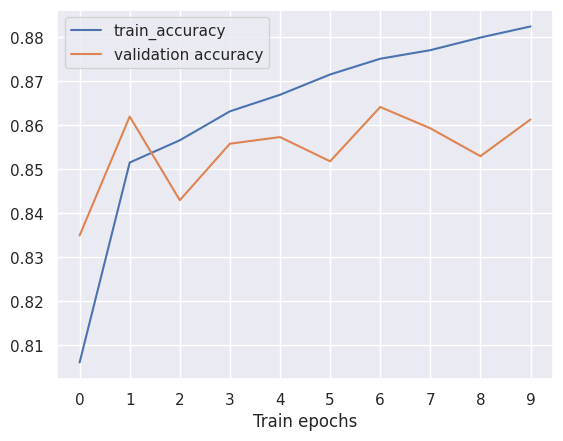

Training accuracy: 0.8825
Validation accuracy: 0.8613


In [39]:
# fashion	[256, 128]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[256,128],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the fashion model...


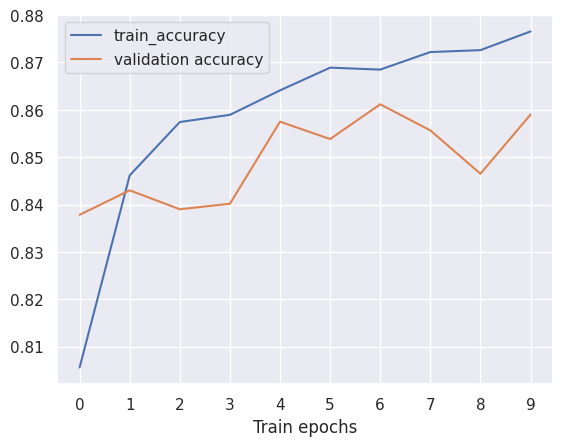

Training accuracy: 0.8766
Validation accuracy: 0.8590


In [40]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[512, 256],activation='relu',optimizer=Adam,learning_rate=0.01)

Training the fashion model...


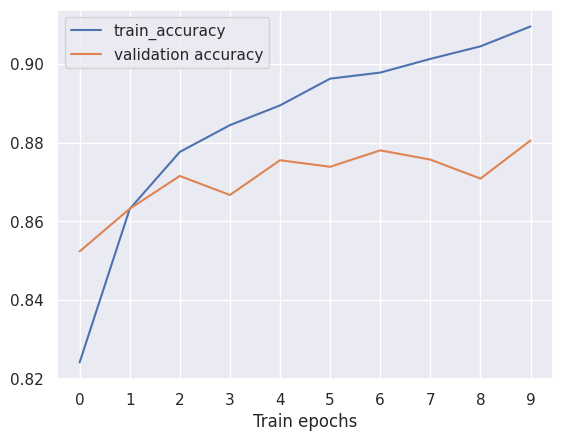

Training accuracy: 0.9095
Validation accuracy: 0.8805


In [41]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[512, 256],activation='relu',optimizer=Adam,learning_rate=0.0025)

Training the fashion model...


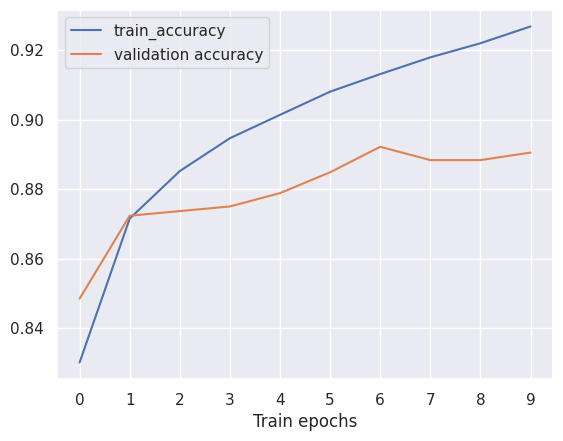

Training accuracy: 0.9268
Validation accuracy: 0.8905


In [42]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[1024, 512],activation='relu',optimizer=Adam,learning_rate=0.00025)

Training the fashion model...


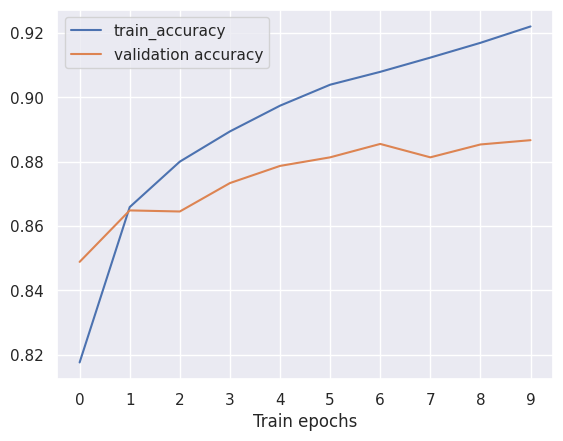

Training accuracy: 0.9220
Validation accuracy: 0.8867


In [43]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[512, 256, 128],activation='relu',optimizer=Adam,learning_rate=0.00025)

Training the fashion model...


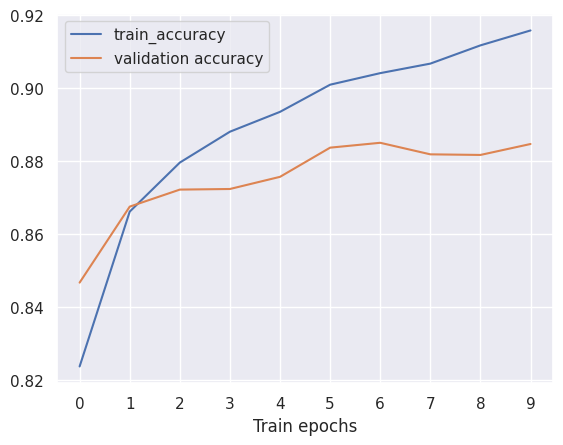

Training accuracy: 0.9158
Validation accuracy: 0.8847


In [44]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[512, 256, 128],activation='relu',optimizer=Adam,learning_rate=0.001)

Training the fashion model...


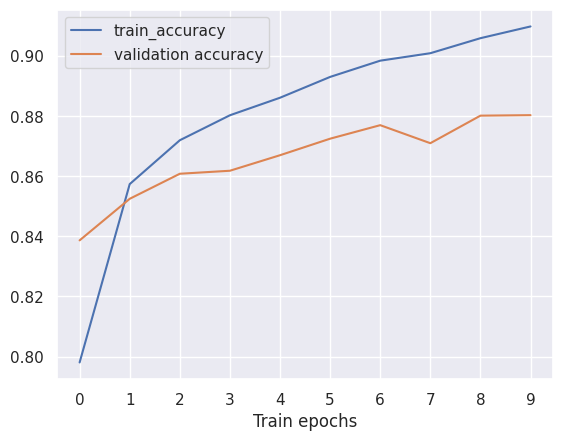

Training accuracy: 0.9099
Validation accuracy: 0.8803


In [45]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[512, 256, 128],activation='relu',optimizer=Adam,learning_rate=0.0001)

Training the fashion model...


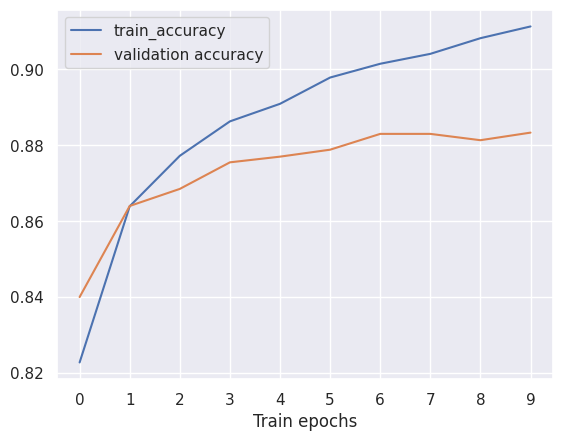

Training accuracy: 0.9113
Validation accuracy: 0.8833


In [46]:
# digits	[512, 256]	relu	Adam	0.01	235146
train_and_evaluate(data='fashion',hidden_layer_sizes=[512, 256, 128],activation='relu',optimizer=Adam,learning_rate=0.0015)

---
### Step 6: Evaluation and Generalization

### <span style="color:chocolate">Exercise 4:</span> Compute metrics (25 points)

Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

1. Calculate accuracy on both train and test datasets. Note: you will need to convert the vector of predicted probabilities to a class label using the argmax operation. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method provided by tf.keras and the <span style="color:chocolate">np.max()</span> method available in NumPy; or you can use the <span style="color:chocolate">model.evaluare()</span> method provided by tf.keras directly.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your accuracy observations.

Training the digits model...


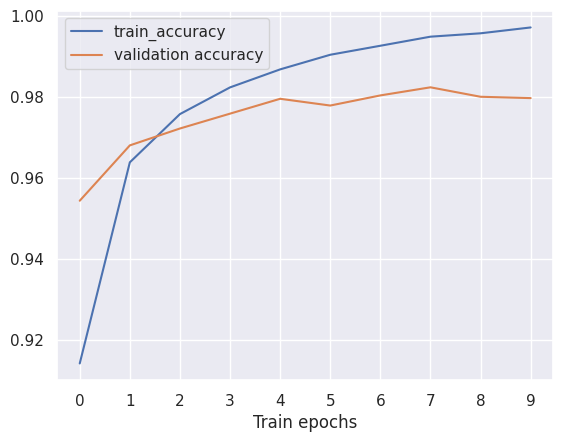

Training accuracy: 0.9971
Validation accuracy: 0.9797
313/313 [==============================] - 1s 2ms/step

Training Accuracy Digits: 0.9284
Test Accuracy Digits: 0.9203


In [47]:

# digits	[512, 256]	relu	Adam	0.00025	235146 0.9973 0.9823
train_and_evaluate(data='digits',hidden_layer_sizes=[512, 256],activation='relu',optimizer=Adam,learning_rate=0.00025)

# Reshape the input data to match the model's expected input shape
X_train_digits_reshaped = X_train_digits.reshape(X_train_digits.shape[0], -1)
X_test_digits_reshaped = X_test_digits.reshape(X_test_digits.shape[0], -1)

# Predictions for training and test datasets
train_predictions_digits = model.predict(X_train_digits_reshaped)
test_predictions_digits = model.predict(X_test_digits_reshaped)

# Convert predicted probabilities to class labels using argmax
train_labels_digits = np.argmax(train_predictions_digits, axis=1)
test_labels_digits = np.argmax(test_predictions_digits, axis=1)

# Calculate training accuracy
train_labels_digits_accuracy = np.mean(train_labels_digits == Y_train_digits)
print(f"\nTraining Accuracy Digits: {train_labels_digits_accuracy:.4f}")

# Calculate test accuracy
test_labels_digits_accuracy = np.mean(test_labels_digits == Y_test_digits)
print(f"Test Accuracy Digits: {test_labels_digits_accuracy:.4f}")


Training the fashion model...


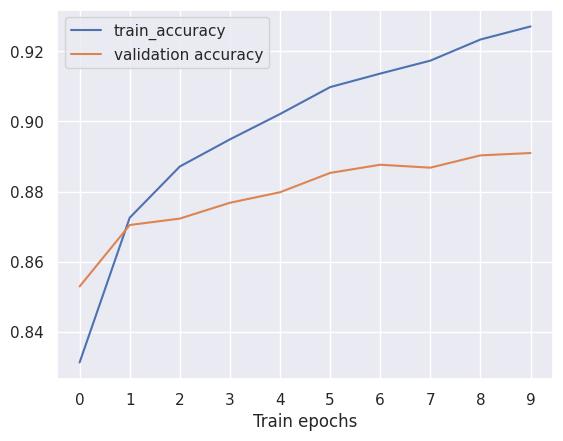

Training accuracy: 0.9271
Validation accuracy: 0.8910
Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2346 - accuracy: 0.9134 - val_loss: 0.3432 - val_accuracy: 0.8830
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2095 - accuracy: 0.9208 - val_loss: 0.3203 - val_accuracy: 0.8900
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1979 - accuracy: 0.9259 - val_loss: 0.3097 - val_accuracy: 0.8959
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1863 - accuracy: 0.9302 - val_loss: 0.3182 - val_accuracy: 0.8931
Epoch 5/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1744 - accuracy: 0.9333 - val_loss: 0.3207 - val_accuracy: 0.8966
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1685 - accuracy: 0.9353 - val_loss: 0.3264 - val_accuracy: 0.8931
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step 

In [48]:
# Reshape the input data to match the model's expected input shape
X_train_fashion_reshaped = X_train_fashion.reshape(X_train_fashion.shape[0], -1)
X_test_fashion_reshaped = X_test_fashion.reshape(X_test_fashion.shape[0], -1)

# Build the model for fashion dataset
model_fashion =train_and_evaluate(data = 'fashion',hidden_layer_sizes=[1024, 512],activation='relu',optimizer=Adam,learning_rate=0.00025)

# Train the model on fashion dataset
history = model_fashion.fit(X_train_fashion_reshaped, Y_train_fashion, epochs=10, validation_data=(X_test_fashion_reshaped, Y_test_fashion))

# Predictions for training and test datasets
train_predictions_fashion = model_fashion.predict(X_train_fashion_reshaped)
test_predictions_fashion = model_fashion.predict(X_test_fashion_reshaped)

# Convert predicted probabilities to class labels using argmax
train_labels_fashion = np.argmax(train_predictions_fashion, axis=1)
test_labels_fashion = np.argmax(test_predictions_fashion, axis=1)

# Calculate training accuracy
train_labels_fashion_accuracy = np.mean(train_labels_fashion == Y_train_fashion)
test_labels_fashion_accuracy = np.mean(test_labels_fashion == Y_test_fashion)
print(f"Training Accuracy Fashion: {train_labels_fashion_accuracy:.4f}")
print(f"Test Accuracy Fashion: {test_labels_fashion_accuracy:.4f}")



Does the model demonstrate strong generalization capabilities? Provide an explanation based on your accuracy observations.

The digit model does show signs of being able to generalize to unseen data pretty well demonstrated by its test and training data being pretty close to eachother.


On the other hand, the fashion model seems to be overfitted, this is evident by its test accuracy being slightly higher than its training accuracy